In [ ]:
# pip install imageio

   ---------------------------------------- 0.0/313.5 kB ? eta -:--:--
   --- ------------------------------------ 30.7/313.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  307.2/313.5 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 313.5/313.5 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML
import glob
import os
import imageio
from tqdm import trange
from tqdm import tqdm
import numpy as np

# bring in a list of images and write to an output file

def make_movie_mp4(image_array, output_file):
    dpi = 200
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]

    # make frames with each figure being the exact dimensions of our plots
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im)

    mywriter = animation.FFMpegWriter(fps=24, bitrate=-1)
    anim = animation.FuncAnimation(fig, animate, frames=len(image_array), interval=60)
    anim.save(output_file,mywriter)

    return anim

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


LG02_circular_l_time120
Num of PNG file: 103


<ipython-input-3-c33b5902fc2e>:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread(png_read_ti)


(600, 2400, 4)


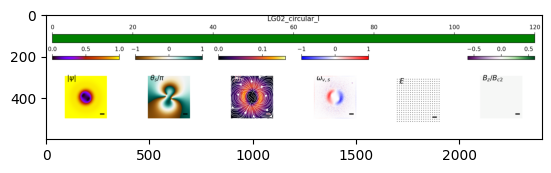

tbar
(600, 2400, 4)
psi
(600, 2400, 4)
phase
(600, 2400, 4)
J
(600, 2400, 4)
w_nu
(600, 2400, 4)
E
(600, 2400, 4)
Bz
(600, 2400, 4)


<ipython-input-3-c33b5902fc2e>:80: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread(png_read_ti)


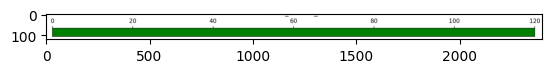

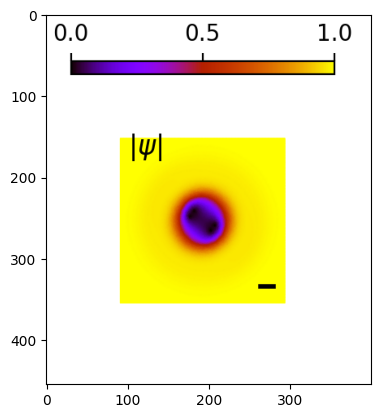

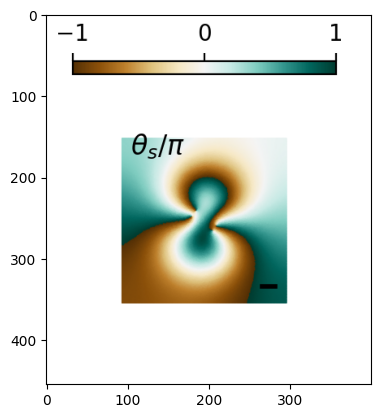

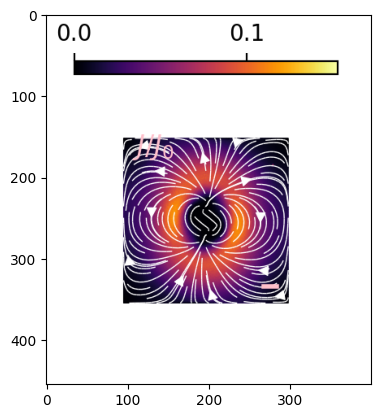

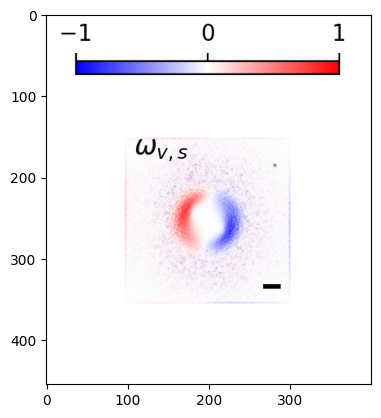

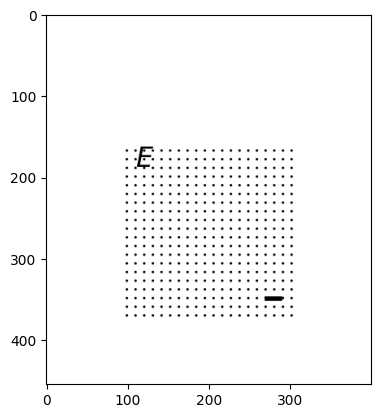

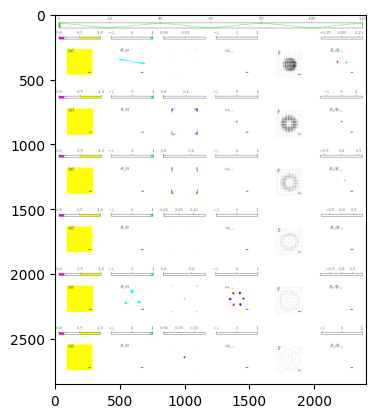

In [3]:
from inspect import EndOfBlock

# define directories

s, p = -1, 2
s, p = 0, 2
s, p = 1, 2
s, p = -1, 1
s, p = 0, 1
s, p = 1, 1
s, p = -1, 0
s, p = 0, 0
s, p = 1, 0



folder_name = r'/content/drive/MyDrive/Colab Notebooks/TempData/20240823_MakeVideo_all/'
anim_dir = folder_name
output_file = 's'+str(s)+'_p'+str(p) # the .mp4 extention will be added below

# foldernames_read = glob.glob(os.path.join(folder_name + 'LG*'))

def folder_LGmode(p,l,s):
  if s==-1: sText = '_circular_r'
  if s==0: sText = '_linear_x'
  if s==1: sText = '_circular_l'
  return 'LG'+str(p)+str(l)+sText+'_time120'

### Print out the number of PNG for all folder
# for s in [-1,0,1]:
#   for l in range(6):
#     for p in range(3):
#       sub_foldername = folder_name + folder_LGmode(p,l,s)
#       png_read = glob.glob(os.path.join(sub_foldername + '/*.png'))
#       print(folder_LGmode(p,l,s))
#       print('Num of PNG file: '+str(len(png_read)))

### Get dimention of single figure of #folder_LGmode(p,l,s)
p, l, s = p, 2, s
sub_foldername = folder_name + folder_LGmode(p,l,s)
png_read = glob.glob(os.path.join(sub_foldername + '/*.png'))
png_read_ti = png_read[3]
print(folder_LGmode(p,l,s))
print('Num of PNG file: '+str(len(png_read_ti)))
original_image = imageio.imread(png_read_ti)
dim = original_image.shape
print(original_image.shape) # (600, 2400, 4)
plt.figure()
plt.imshow(original_image[:,:,:])
plt.show()
width_subplot = int(dim[1]/6)
type_set = ['tbar','psi','phase','J','w_nu','E','Bz']
range_set = {'tbar':  {0:0,1:dim[1],2:30,3:150,4:0,5:dim[2]},
             'psi':   {0:width_subplot*0,1:width_subplot*1,2:145,3:dim[0],4:0,5:dim[2]},
             'phase': {0:width_subplot*1,1:width_subplot*2,2:145,3:dim[0],4:0,5:dim[2]},
             'J':     {0:width_subplot*2,1:width_subplot*3,2:145,3:dim[0],4:0,5:dim[2]},
             'w_nu':  {0:width_subplot*3,1:width_subplot*4,2:145,3:dim[0],4:0,5:dim[2]},
             'E':     {0:width_subplot*4,1:width_subplot*5,2:145,3:dim[0],4:0,5:dim[2]},
             'Bz':    {0:width_subplot*5,1:width_subplot*6,2:145,3:dim[0],4:0,5:dim[2]},
             'par':   {0:width_subplot*0,1:width_subplot*6,2:145,3:dim[0],4:0,5:dim[2]},}
pixal_y_tbar = range_set['tbar'][3]-range_set['tbar'][2]
pixal_y_par = range_set['par'][3]-range_set['par'][2]

### Test of splited plots
for typenum in range(7):
  plottype = type_set[typenum]
  print(plottype)
  image_load = np.copy(original_image)
  plt.figure()
  print(image_load.shape)
  # plt.imshow(image_load[range_set[plottype][0]:range_set[plottype][1],range_set[plottype][2]:range_set[plottype][3],:])
  plt.imshow(image_load[range_set[plottype][2]:range_set[plottype][3],range_set[plottype][0]:range_set[plottype][1],:])

### Check configuration
ti_frame = range(0,1201,5)
for ti in [5]:
  for l in range(6):
    sub_foldername = folder_name + folder_LGmode(p,l,s)
    png_read_ti = os.path.join(sub_foldername + '/'+str(ti)+'.png')
    original_image = imageio.imread(png_read_ti)
    if l==0:
        plottype = 'tbar'
        image_load = np.zeros([pixal_y_tbar+pixal_y_par*6,dim[1],4])
        image_load[0:pixal_y_tbar,:,:] = original_image[range_set[plottype][2]:range_set[plottype][3],range_set[plottype][0]:range_set[plottype][1],:]
    plottype = 'par'
    image_load[pixal_y_tbar+pixal_y_par*l:pixal_y_tbar+pixal_y_par*(l+1),:,:] = original_image[range_set[plottype][2]:range_set[plottype][3],range_set[plottype][0]:range_set[plottype][1],:]
  plt.imshow(image_load)


In [ ]:
import cv2
# image_load = np.ones([pixal_y_tbar+pixal_y_par*6,dim[1],4])*255
# cv2.imwrite(anim_dir+'backgrond.png', image_load)

### Write image

images = []

ti_frame = range(0,1201,5)
for ti in tqdm(ti_frame):
  # image_load = imageio.imread(anim_dir+'backgrond.png')
  image_load = np.ones([pixal_y_tbar+pixal_y_par*6,dim[1],4])*255
  for l in range(6):
    sub_foldername = folder_name + folder_LGmode(p,l,s)
    png_read_ti = os.path.join(sub_foldername + '/'+str(ti)+'.png')
    if os.path.getsize(png_read_ti) > 10: original_image = imageio.imread(png_read_ti)
    else: print('Empty file: ti '+str(ti)+', l '+str(l))
    if l==0:
        plottype = 'tbar'
        image_load[0:pixal_y_tbar,:,:] = original_image[range_set[plottype][2]:range_set[plottype][3],range_set[plottype][0]:range_set[plottype][1],:]
    plottype = 'par'
    image_load[pixal_y_tbar+pixal_y_par*l:pixal_y_tbar+pixal_y_par*(l+1),:,:] = original_image[range_set[plottype][2]:range_set[plottype][3],range_set[plottype][0]:range_set[plottype][1],:]
    # print(png_read_ti)
  cv2.imwrite(anim_dir+'temp/'+str(ti)+'.png', image_load)
  images.append(imageio.imread(anim_dir+'temp/'+str(ti)+'.png'))
    # this checks to make sure there's more than 0 bytes in the filename
    # if os.path.getsize(filenames[i]) > 10:

# use our function to make the movie
anim = make_movie_mp4(images, anim_dir + output_file + '.mp4')

''' Done. '''

  0%|          | 0/241 [00:00<?, ?it/s]<ipython-input-6-9da4d9cda537>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  if os.path.getsize(png_read_ti) > 10: original_image = imageio.imread(png_read_ti)
<ipython-input-6-9da4d9cda537>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(anim_dir+'temp/'+str(ti)+'.png'))
100%|██████████| 241/241 [07:34<00:00,  1.89s/it]


' Done. '

<Figure size 2400x2850 with 0 Axes>

In [ ]:
# ### Make video

# images = []

# ti_frame = range(0,1201,5)
# for ti in ti_frame:
#   image_load = imageio.imread(anim_dir+'backgrond.png')
#   for l in range(6):
#     sub_foldername = folder_name + folder_LGmode(p,l,s)
#     png_read_ti = os.path.join(sub_foldername + '/'+str(ti)+'.png')
#     if os.path.getsize(png_read_ti) > 10: original_image = imageio.imread(png_read_ti)
#     else: print('Empty file: ti '+str(ti)+', l '+str(l))
#     if l==0:
#         plottype = 'tbar'
#         image_load[0:pixal_y_tbar,:,:] = original_image[range_set[plottype][2]:range_set[plottype][3],range_set[plottype][0]:range_set[plottype][1],:]
#     plottype = 'par'
#     image_load[pixal_y_tbar+pixal_y_par*l:pixal_y_tbar+pixal_y_par*(l+1),:,:] = original_image[range_set[plottype][2]:range_set[plottype][3],range_set[plottype][0]:range_set[plottype][1],:]
#     print(png_read_ti)
#   plt.imshow(image_load)
#   images.append(imageio.imread(image_load))

#     # this checks to make sure there's more than 0 bytes in the filename
#     # if os.path.getsize(filenames[i]) > 10:

# # use our function to make the movie
# anim = make_movie_mp4(images, anim_dir + output_file + '.mp4')

# ''' Done. '''

<ipython-input-5-0d8dc9da002d>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_load = imageio.imread(anim_dir+'backgrond.png')
<ipython-input-5-0d8dc9da002d>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  if os.path.getsize(png_read_ti) > 10: original_image = imageio.imread(png_read_ti)


/content/drive/MyDrive/Colab Notebooks/TempData/20240823_MakeVideo_all/LG20_linear_x_time120/0.png
/content/drive/MyDrive/Colab Notebooks/TempData/20240823_MakeVideo_all/LG21_linear_x_time120/0.png
/content/drive/MyDrive/Colab Notebooks/TempData/20240823_MakeVideo_all/LG22_linear_x_time120/0.png
/content/drive/MyDrive/Colab Notebooks/TempData/20240823_MakeVideo_all/LG23_linear_x_time120/0.png
/content/drive/MyDrive/Colab Notebooks/TempData/20240823_MakeVideo_all/LG24_linear_x_time120/0.png


ValueError: could not broadcast input array from shape (455,2400,4) into shape (420,2400,4)

In [ ]:
# plt.imshow(image_load)
# imageio.imread(image_load)
image_load.shape

(2815, 2400, 4)

In [ ]:
# images = []

# for i in trange(len(filenames)):

#     # this checks to make sure there's more than 0 bytes in the filename
#     if patch_num==0:
#       if os.path.getsize(filenames[i]) > 10: images.append(imageio.imread(filenames[i]))
#     if patch_num>0:
#       if os.path.getsize(filenames[i]) > 10:
#         patched_image = imageio.imread(filenames[i])
#         for i in range(patch_num):
#           patched_image[patch_range[str(i)]['x1']:patch_range[str(i)]['x2'],patch_range[str(i)]['y1']:patch_range[str(i)]['y2'],:] = patch_image[patch_range[str(i)]['x1']:patch_range[str(i)]['x2'],patch_range[str(i)]['y1']:patch_range[str(i)]['y2'],:]
#           images.append(patched_image)

# # use our function to make the movie
# anim = make_movie_mp4(images, anim_dir + output_file + '.mp4')

# ''' Done. '''

2400

In [ ]:
just to follow up on Heather QC' answer, here is an illustration of the np.stack functions and which dimensions are concerned:

arr1 = np.array([[[1,2],[2,3]],
                 [[1,2],[2,3]],
                 [[1,2],[2,3]]])

arr2 = np.array([[[5,6],[8,7]],
                 [[7,6],[7,8]],
                 [[6,7],[7,8]]])

print("arr1 shape  ", arr1.shape)
print("arr2 shape  ", arr2.shape)
print("vstack shape", np.vstack((arr1, arr2)).shape)
print("hstack shape", np.hstack((arr1, arr2)).shape)
print("dstack shape", np.dstack((arr1, arr2)).shape)

>>> arr1 shape   (3, 2, 2)
>>> arr2 shape   (3, 2, 2)
>>> vstack shape (6, 2, 2)
>>> hstack shape (3, 4, 2)
>>> dstack shape (3, 2, 4)

In [ ]:
range_set[plottype][1]
range_set[plottype][0]
dim[0]
# range(width_subplot*1,width_subplot*2)
# original_image[range_set[plottype][1]][range_set[plottype][0]][:].shape
# plt.imshow(original_image[range(200,400)][np.array(range_set[plottype][1]),:])
# range_set[plottype][1]
# range_set[plottype][1]
np.array(ti_frame)

array([   0,    5,   10,   15,   20,   25,   30,   35,   40,   45,   50,
         55,   60,   65,   70,   75,   80,   85,   90,   95,  100,  105,
        110,  115,  120,  125,  130,  135,  140,  145,  150,  155,  160,
        165,  170,  175,  180,  185,  190,  195,  200,  205,  210,  215,
        220,  225,  230,  235,  240,  245,  250,  255,  260,  265,  270,
        275,  280,  285,  290,  295,  300,  305,  310,  315,  320,  325,
        330,  335,  340,  345,  350,  355,  360,  365,  370,  375,  380,
        385,  390,  395,  400,  405,  410,  415,  420,  425,  430,  435,
        440,  445,  450,  455,  460,  465,  470,  475,  480,  485,  490,
        495,  500,  505,  510,  515,  520,  525,  530,  535,  540,  545,
        550,  555,  560,  565,  570,  575,  580,  585,  590,  595,  600,
        605,  610,  615,  620,  625,  630,  635,  640,  645,  650,  655,
        660,  665,  670,  675,  680,  685,  690,  695,  700,  705,  710,
        715,  720,  725,  730,  735,  740,  745,  7

In [ ]:

# define directories

folder_name = r'/content/drive/MyDrive/Colab Notebooks/TempData/20240823_MakeVideo_all/'
foldernames_read = glob.glob(os.path.join(image_dir + '*.png'))

image_dir = folder_name+image_folder+'/'
anim_dir = folder_name
output_file = image_folder # the .mp4 extention will be added below

# bring in a list of images and write to an output file

def make_movie_mp4(image_array, output_file):
    dpi = 200
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]

    # make frames with each figure being the exact dimensions of our plots
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im)

    mywriter = animation.FFMpegWriter(fps=24, bitrate=-1)
    anim = animation.FuncAnimation(fig, animate, frames=len(image_array), interval=60)
    anim.save(output_file,mywriter)

    return anim

# Go through each filename and add it to our image stack
# filenames = sorted(glob.glob(os.path.join(image_dir + '*.png')))
filenames_read = glob.glob(os.path.join(image_dir + '*.png'))
print(len(filenames_read))
# filenames_read


filenames = np.copy(filenames_read)
for i in range(len(filenames)):
  filenames[i] = image_dir + str(int(i*5))+'.png'
filenames


241


array(['/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/0.png',
       '/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/5.png',
       '/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/10.png',
       '/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/15.png',
       '/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/20.png',
       '/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/25.png',
       '/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/30.png',
       '/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/35.png',
       '/content/drive/MyDrive/Colab Notebooks/TempData/20240816_MakeAnimation/LG12_circular_r_time120/40.

# Make patch

' Done. '

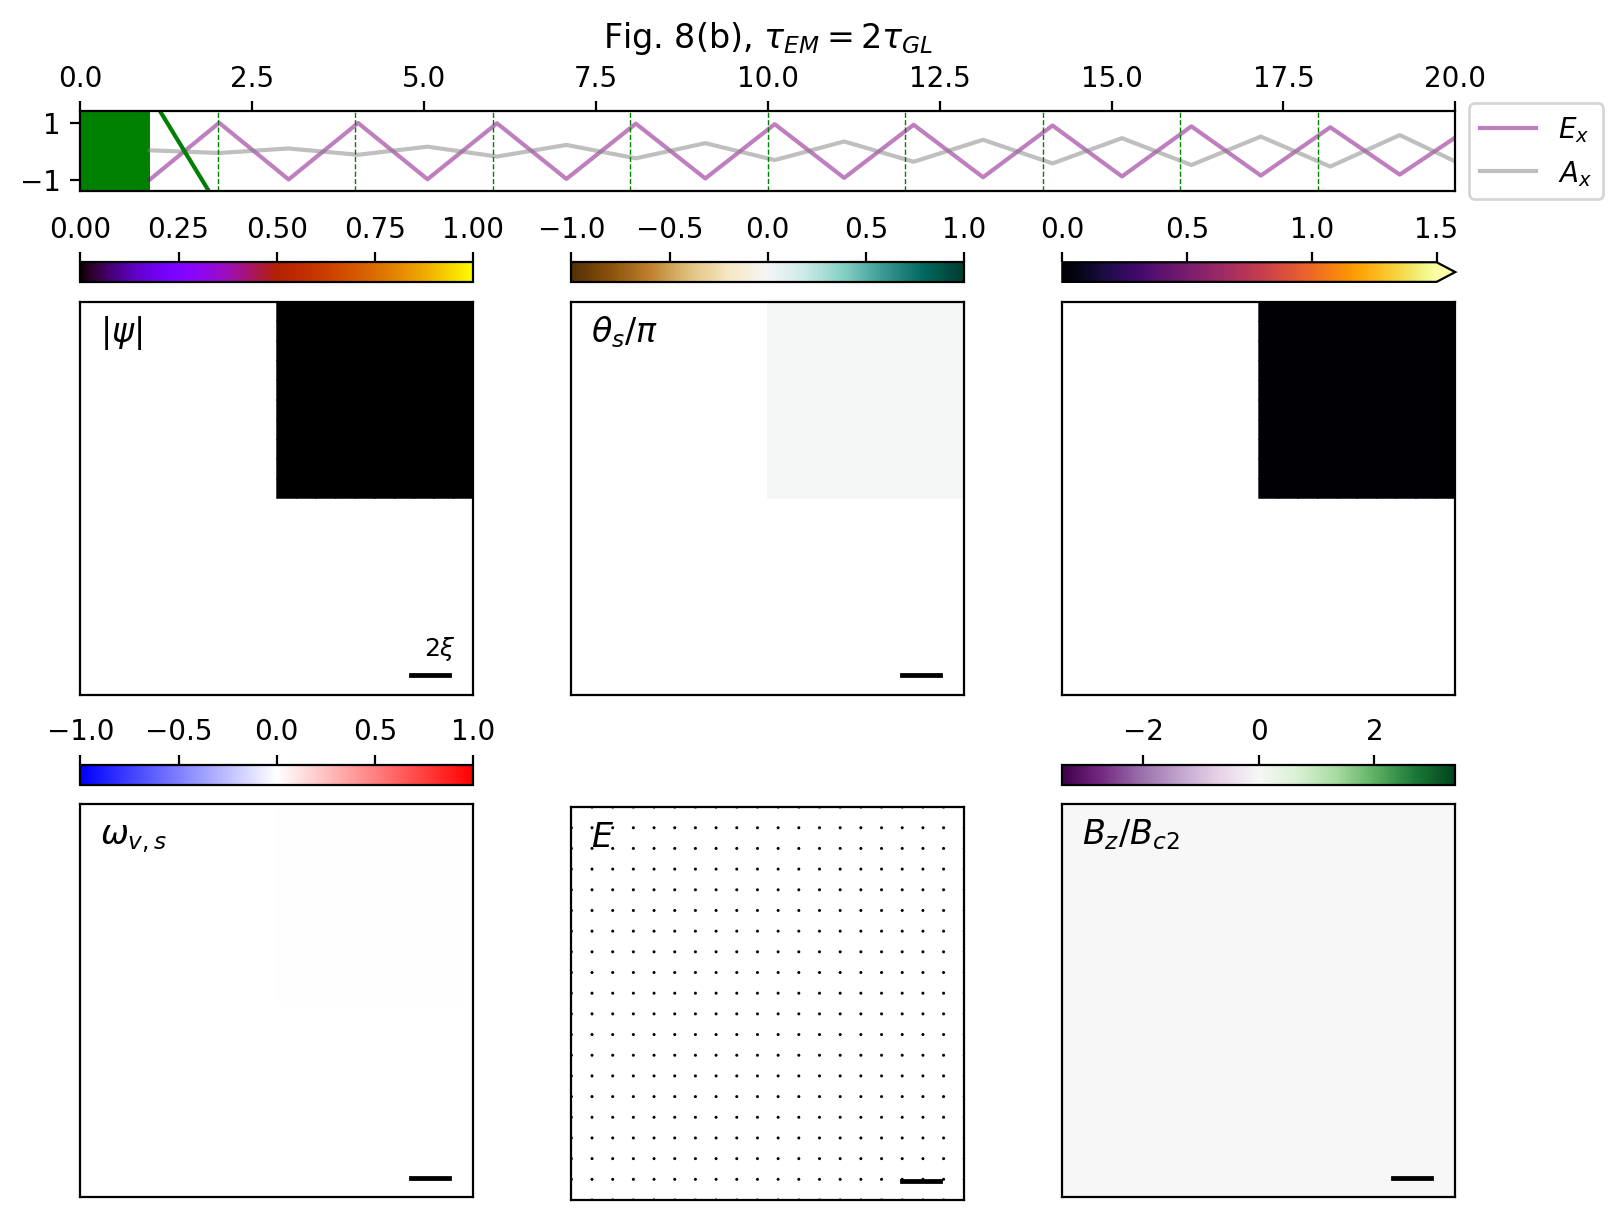

In [ ]:
### Make revised part of png

### Build-up subplot

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec
import matplotlib.transforms as mtrans

dpi=200
fps=20
# w_input = 2*np.pi/40
# E0i = 2
solve_time = 20
save_frame = 3
# max_frame = int(len(time)/save_frame)
# frame_set = np.arange(max_frame)*save_frame
# frame_set = frame_set[343:]
frame_set = [1]

iniframe = frame_set[0]

ti_set = [1,2,3]
Parameter_set = ti_set
K0 = 2.095153729869544
time = np.linspace(0,100,100) # Virtual time !!!!!!!!!!!!!!!!!!!!
Bc2_value = 3 # virtual value !!!!!!!!!!!!!!!!!!!!
w_input = 2*np.pi/2
xi = 0.1
MAKE_ANIMATIONS = True
quiver_mesh_n = 20
    # xlim = [(Xtri/xi).min(), (Xtri/xi).max()]
    # ylim = [(Ytri/xi).min(), (Ytri/xi).max()]
xlim = [-10, 10]
ylim = [-10, 10]

mag_cmap = "gnuplot"#"viridis"
phase_cmap = "BrBG"#"twilight_shifted"
vorticity_cmap = "bwr"
j_cmap = 'inferno'
cmap_all = [' ',mag_cmap, phase_cmap, j_cmap, vorticity_cmap, ' ', "PRGn"]
vmin_all = [  0,       0,        -1,       0,             -1,   0,    -3.4]
vmax_all = [  1,       1,         1,     1.5,              1,   1,     3.4]
# rset = np.linspace(0, 1, 100)
# vorticity_cmap = ListedColormap((new_cbar(rset))**1.5)#"bwr"

psi_label = "$|\\psi|$"
phase_label = "$\\theta_s / \\pi$"
vorticity_label = "$\\omega_{v,s}$"
j_label = "$J/J_0$"
label_all = [' ', psi_label, phase_label, j_label, vorticity_label,'$E$','$B_z/B_{c2}$']
labelfontsize = 12
labelcolor_all = [' ', 'k', 'k', 'white', 'k', 'k', 'k']

# create objects
fig = plt.figure(constrained_layout=True, figsize=(8,6), dpi=dpi)
gs = GridSpec(3, 3, figure=fig, height_ratios = [0.6, 3, 3], width_ratios = [1, 1, 1])

# create sub plots as grid
ax = {}
ax[0] = fig.add_subplot(gs[0, 0:])
ax[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

ax1 = ax[0]
color = 'purple'
# ax1.set_xlabel('Time ($\\tau_{GL}$)')
# ax1.set_ylabel('$E_{x}$', color=color)
ax1.plot(time[iniframe:], 1*np.cos(time[iniframe:]*w_input), color=color, alpha=0.5, label='$E_x$')
color = 'gray'
# ax1.set_ylabel('$A_{x}$', color=color)  # we already handled the x-label with ax1
ax1.plot(time[iniframe:], -1*np.sin(time[iniframe:]*w_input), color=color, alpha=0.5, label='$A_x$')
# ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-1.4,1.4])
ax1.set_xlim([0,solve_time])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_yticks([-1,1])
ax1.set_title('Fig. 8(b), $\\tau_{EM}=2\\tau_{GL}$')
left, bottom, width, height = (0, -2, time[iniframe], 4)
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor="green", alpha=1)
ax1.add_patch(rect)
for Nti in range(int(solve_time*w_input/2/np.pi)+1): ax1.axvline(x=(Nti)*(2*np.pi/w_input),color='g',linestyle='dashed',linewidth=0.5)

ax[1] = fig.add_subplot(gs[1, 0])
ax[2] = fig.add_subplot(gs[1, 1])
ax[3] = fig.add_subplot(gs[1, 2])
ax[4] = fig.add_subplot(gs[-1, 0])
ax[5] = fig.add_subplot(gs[-1, 1])
ax[6] = fig.add_subplot(gs[-1, 2])


if MAKE_ANIMATIONS:

# Basic sattings
    height = 2
    width = 2
    w0 = 0.4
    X = np.linspace(-width/2,width/2,quiver_mesh_n)
    Y = np.linspace(-height/2,height/2,quiver_mesh_n)
    Xv, Yv = np.meshgrid(X, Y)
    virtual_2D_data = np.zeros_like(Xv)
    virtual_2D_data_x = np.zeros_like(Xv)
    virtual_2D_data_y = np.zeros_like(Xv)
    shading = "gouraud"
    # fps = 10
    # dpi= 100
    max_cols = 6
    min_frame = 0
    max_frame = -1
    autoscale = False
    dimensionles = False
    axis_labels = False
    axes_off = False
    title_off = False
    full_title = True
    logger = None
    figure_kwargs = None
    writer = None
    quiver_scale = 1
    # quiver_mesh_n = 20
    width_quiver = 0.08
    dimensionless = False
    # quantities = ("order_parameter", "phase")
    # output_file = folder_name+'/'+'test'+"_video.mp4"

    def timescan(frame):
        yout = np.ones_like(time)*(-2)
        yout[frame] = 2
        return yout

    for num_set in frame_set:
            collections = []

            # num_set = 1 # Change here for test !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            ti = time
            Nti = num_set

            axn = ax[0]
            collection = axn.plot(time, timescan(num_set), color='green')
            # collections.append(collection)

            # E_x, E_y = E_input_frame(Xv,Yv,ti,take_real=False)
            # B_x, B_y, B_z = E2Bv(Xv,Yv,E0i*E_x,E0i*E_y,constant_Bz,c,w_input)

            for i in range(1,5):

                Z_value = virtual_2D_data
                cmap = str(np.copy(cmap_all[i]))
                label = str(np.copy(label_all[i]))
                vmax = np.copy(vmax_all[i])
                vmin = np.copy(vmin_all[i])
                labeltextcolor = str(np.copy(labelcolor_all[i]))

                axn = ax[i]
                collection = axn.pcolormesh(Z_value,
                        shading=shading,
                        cmap=cmap,
                        vmin=vmin,
                        vmax=vmax,
                    )
                # if i==3: axn.streamplot(Xv/xi, Yv/xi, Jx, Jy, color="white", density=.8, linewidth=0.5)
                if num_set==iniframe:
                  if i!=3: cbar = fig.colorbar(collection, ax=axn, location='top')
                if num_set==iniframe:
                  if i==3: cbar = fig.colorbar(collection, ax=axn, location='top',extend='max')
                # cbar.set_label(opts.clabel)
                axn.set_aspect("equal")
                axn.set_xlim(xlim)
                axn.set_ylim(ylim)
                axn.set_xticks([])
                axn.set_yticks([])
                if num_set==iniframe:
                  if int(i)==1: axn.text(7.5,-8,'$2\\xi$', fontsize=9)
                fontprops = fm.FontProperties(size=4, family='monospace')
                scalebar = AnchoredSizeBar(axn.transData,
                               2, '            ', 'lower right',
                               pad=0.15,
                               color=labeltextcolor,
                               frameon=False,
                               size_vertical=.1,fontproperties=fontprops)
                axn.add_artist(scalebar)
                axn.text(-9,8,label, fontsize=labelfontsize, color=labeltextcolor)
                # collections.append(collection)

            if True: # For new plot: "E"
                i = 5
                label = str(np.copy(label_all[i]))
                axn = ax[i]
                if num_set>iniframe: collection_E = axn.clear()
                collection_E = axn.quiver(
                                    X/xi,
                                    Y/xi,
                                    virtual_2D_data_x,
                                    virtual_2D_data_y,
                                    scale=quiver_scale,
                                    scale_units='x',
                                    width=width_quiver*abs(X[2]-X[1]),)
                axn.set_aspect("equal")
                axn.set_xlim(xlim)
                axn.set_ylim(ylim)
                axn.set_xticks([])
                axn.set_yticks([])
                fontprops = fm.FontProperties(size=4, family='monospace')
                scalebar = AnchoredSizeBar(axn.transData,
                               2, '            ', 'lower right',
                               pad=0.15,
                               color=labeltextcolor,
                               frameon=False,
                               size_vertical=.1,fontproperties=fontprops)
                axn.add_artist(scalebar)
                axn.text(-9,8,label, fontsize=labelfontsize, color=labeltextcolor)
                # if num_set==0: collections.append(collection_E)

            if True: # For new plot: "Bz"
                i = 6
                vmax = np.copy(vmax_all[i])
                vmin = np.copy(vmin_all[i])
                label = str(np.copy(label_all[i]))
                axn = ax[i]
                collection = axn.pcolormesh(
                        Xv/xi,
                        Yv/xi,
                        virtual_2D_data,
                        cmap="PRGn",
                        shading='gouraud',
                        vmin=vmin,
                        vmax=vmax,
                )
                if num_set==iniframe: cbar = plt.colorbar(collection, ax=axn, location='top')
                # cbar.set_label('$B_{z}$ ['+field_units+']')
                axn.set_aspect("equal")
                # axn.set_title('$B_{z}$ ')
                axn.set_xlim(xlim)
                axn.set_ylim(ylim)
                axn.set_xticks([])
                axn.set_yticks([])
                fontprops = fm.FontProperties(size=4, family='monospace')
                scalebar = AnchoredSizeBar(axn.transData,
                               2, '            ', 'lower right',
                               pad=0.15,
                               color=labeltextcolor,
                               frameon=False,
                               size_vertical=.1,fontproperties=fontprops)
                axn.add_artist(scalebar)

                axn.text(-9,8,label, fontsize=labelfontsize, color=labeltextcolor)
                # collections.append(collection)
            plt.savefig(folder_name+'frame_for_patch.png')


file_patch = folder_name+'frame_for_patch.png'
''' Done. '''

In [ ]:
from IPython.display import display, Image

i = 0

patch_num = 0
patch_range = {}
patch_range['0'] = {'x1':700,'x2':780,'y1':1000,'y2':1460,}
patch_range['1'] = {'y1':0,'y2':-1,'x1':0,'x2':50,}

if patch_num>0:
    # this checks to make sure there's more than 0 bytes in the filename
    if os.path.getsize(filenames[i]) > 10:
      original_image = imageio.imread(filenames[i])
      print(original_image.shape)
      plt.imshow(original_image[:,:,:])
      plt.show()
      patch_image = imageio.imread(file_patch)
      print(patch_image.shape)
      plt.imshow(patch_image[:,:,:])
      plt.show()
      patched_image = original_image
      for i in range(patch_num):
        plt.imshow(original_image[patch_range[str(i)]['x1']:patch_range[str(i)]['x2'],patch_range[str(i)]['y1']:patch_range[str(i)]['y2'],:])
        plt.show()
        plt.imshow(patch_image[patch_range[str(i)]['x1']:patch_range[str(i)]['x2'],patch_range[str(i)]['y1']:patch_range[str(i)]['y2'],:])
        plt.show()
        patched_image[patch_range[str(i)]['x1']:patch_range[str(i)]['x2'],patch_range[str(i)]['y1']:patch_range[str(i)]['y2'],:] = patch_image[patch_range[str(i)]['x1']:patch_range[str(i)]['x2'],patch_range[str(i)]['y1']:patch_range[str(i)]['y2'],:]
      plt.imshow(patched_image[:,:,:])
      plt.show()

# np.shape(filenames[i])

# Make .mp4 with patch

In [ ]:
images = []

for i in trange(len(filenames)):

    # this checks to make sure there's more than 0 bytes in the filename
    if patch_num==0:
      if os.path.getsize(filenames[i]) > 10: images.append(imageio.imread(filenames[i]))
    if patch_num>0:
      if os.path.getsize(filenames[i]) > 10:
        patched_image = imageio.imread(filenames[i])
        for i in range(patch_num):
          patched_image[patch_range[str(i)]['x1']:patch_range[str(i)]['x2'],patch_range[str(i)]['y1']:patch_range[str(i)]['y2'],:] = patch_image[patch_range[str(i)]['x1']:patch_range[str(i)]['x2'],patch_range[str(i)]['y1']:patch_range[str(i)]['y2'],:]
          images.append(patched_image)

# use our function to make the movie
anim = make_movie_mp4(images, anim_dir + output_file + '.mp4')

''' Done. '''

  0%|          | 0/241 [00:00<?, ?it/s]<ipython-input-23-91c56d34d290>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  if os.path.getsize(filenames[i]) > 10: images.append(imageio.imread(filenames[i]))
100%|██████████| 241/241 [01:30<00:00,  2.68it/s]


' Done. '

<Figure size 2400x600 with 0 Axes>

In [ ]:
print(anim_dir)
print(output_file + '.mp4')

/content/drive/MyDrive/Colab Notebooks/TempData_collect20240705_MakeVideo/20240625_makeAnimation/
/content/drive/MyDrive/Colab Notebooks/TempData_collect20240705_MakeVideo/20240625_makeAnimation//test_video.mp4.mp4
